<a href="https://colab.research.google.com/github/Bigdata92/190902AdvancedVisualPerception/blob/master/190910_IMDB_classification_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import keras
import numpy as np
keras.__version__

'2.2.4'

In [36]:
!pip install numpy==1.16.1

In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [38]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    print results.shape
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

In [40]:

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [0]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
# Data split
x_val = x_train[: 10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [44]:
decoded_review

u"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you t

In [0]:
# Build Model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))




In [0]:
# Model Compile
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [63]:
# Model Training and save training history
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data =(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 209us/step - loss: 0.5042 - acc: 0.7889 - val_loss: 0.3776 - val_acc: 0.8704
Epoch 2/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2991 - acc: 0.9047 - val_loss: 0.3001 - val_acc: 0.8899
Epoch 3/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.2174 - acc: 0.9283 - val_loss: 0.3079 - val_acc: 0.8717
Epoch 4/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1748 - acc: 0.9437 - val_loss: 0.2821 - val_acc: 0.8848
Epoch 5/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.1422 - acc: 0.9542 - val_loss: 0.2856 - val_acc: 0.8858
Epoch 6/20
15000/15000 [==============================] - 2s 156us/step - loss: 0.1148 - acc: 0.9652 - val_loss: 0.3148 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 157us/step - loss: 0.0979 - acc: 0.9708 - val_loss: 0.3130 - 

In [48]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

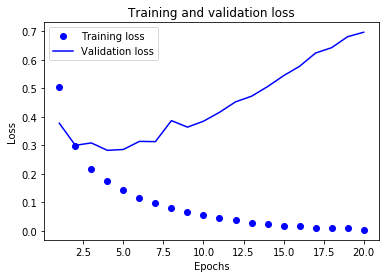

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc'] # key 값을 넣어줌
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

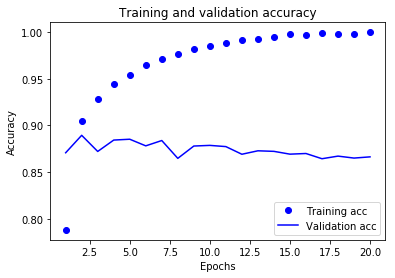

In [50]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.4752 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 3s 115us/step - loss: 0.2659 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 114us/step - loss: 0.1985 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 3s 112us/step - loss: 0.1677 - acc: 0.9403


In [0]:
result = model.predict(x_test)

In [53]:
result

array([[0.13788217],
       [0.9997002 ],
       [0.28713247],
       ...,
       [0.06988791],
       [0.04240662],
       [0.47507212]], dtype=float32)

In [0]:
#  thresholding

for i in range(len(result)):
  if result[i] > 0.5:
    result[i] = 1
  else:
    result[i] = 0
  


In [55]:
result

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)